<a href="https://colab.research.google.com/github/Vladzzkuznetsov/Raschet_ploskogo_secheniya/blob/main/raschet_ploskogo_secheniya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import random
#random.seed(42)

https://drive.google.com/file/d/1NQmGYKoP3VaZnjTQP0uAkvAMaPxtFHSa/view?usp=sharing

https://drive.google.com/file/d/1r-bifEYHOb8cdPYQPTu37zGCtkAyYopd/view?usp=sharing

In [17]:
! gdown 1NQmGYKoP3VaZnjTQP0uAkvAMaPxtFHSa

! gdown 1r-bifEYHOb8cdPYQPTu37zGCtkAyYopd

Downloading...
From: https://drive.google.com/uc?id=1NQmGYKoP3VaZnjTQP0uAkvAMaPxtFHSa
To: /content/Bet_List75.csv
100% 19.5k/19.5k [00:00<00:00, 19.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1r-bifEYHOb8cdPYQPTu37zGCtkAyYopd
To: /content/List75.csv
100% 19.4k/19.4k [00:00<00:00, 25.6MB/s]


In [142]:
def pred_obrab(df, h_sech = 150, beton = False):
  '''
  Функция для обработки входного сырого df.
  Запрашивает df - датафрейм
  h_sech - высоту сечения
  beton - является ли df сведением о бетонном сечении
  '''
  df.columns = ['X_autocad', 'len_autocad']
  df['X_autocad'] = df['X_autocad']-df['X_autocad'].min() # расстояние от 0
  df = df.groupby('X_autocad', as_index = False).sum() # сумируем длины "разбитой" линии
  df['X_autocad'] = df['X_autocad'].astype(float) # Приводим к типу float
  df['len_autocad'] = df['len_autocad'].astype(float)
  if beton:
    t = float(df.iloc[0,1]) # находим наибольшую линию
    m = float(df['X_autocad'].max() )# вводим параметр высоты
    while m < float(h_sech-0.1):
      new_row = {'X_autocad': m + (0.1) , 'len_autocad': t}
      df = df.append(new_row, ignore_index=True)
      m = m + (0.1)
    df['Area_b'] = df['len_autocad']*0.1*2 # Приводим длинну линии к площади в мм
    df = df[['X_autocad','Area_b']] # отрубаем строку len_autocad
  else:
    df['Area_list'] = df['len_autocad']*0.1*2
    df = df[['X_autocad','Area_list']] # отрубаем строку len_autocad
  df = df.sort_values('X_autocad', ascending = False)# Сортироуем df
  
  return df


In [146]:
b = pd.read_csv('/content/Bet_List75.csv' , header=None)
b = pred_obrab(df = b, beton = True)

print(f'''повторяющихся строк {len(pd.unique(b['X_autocad'])) - len(b)}''')
b

повторяющихся строк 0


,X_autocad,Area_b
1500,150.0,4.218562
1499,149.9,4.218562
1498,149.8,4.218562
1497,149.7,4.218562
1496,149.6,4.218562
...,...,...
4,0.4,4.492102
3,0.3,4.445054
2,0.2,4.389744
1,0.1,4.320599


In [147]:
l = pd.read_csv('/content/List75.csv' , header=None)
l = pred_obrab(l)
print(f'''повторяющихся строк {len(pd.unique(l['X_autocad'])) - len(l)}''')
l


повторяющихся строк 0


,X_autocad,Area_list
749,74.9,6.749242
748,74.8,6.959277
747,74.7,7.101728
746,74.6,7.215776
745,74.5,7.312881
...,...,...
4,0.4,4.525490
3,0.3,4.474357
2,0.2,4.414392
1,0.1,4.339601


In [152]:
df = b.merge(l, how='left', on='X_autocad')
df = df.fillna(0)

print(f'''повторяющихся строк {len(pd.unique(df['X_autocad'])) - len(df)}''')
df

повторяющихся строк 0


,X_autocad,Area_b,Area_list
0,150.0,4.218562,0.000000
1,149.9,4.218562,0.000000
2,149.8,4.218562,0.000000
3,149.7,4.218562,0.000000
4,149.6,4.218562,0.000000
...,...,...,...
1496,0.4,4.492102,4.525490
1497,0.3,4.445054,4.474357
1498,0.2,4.389744,4.414392
1499,0.1,4.320599,4.339601


In [438]:
s = [i+1 for i in range(20) ]
l = [random.randint(5, 100) for i in range(20) ]
l2 = [random.randint(5, 10) for i in range(20) ]

df = pd.DataFrame({'Area_b':l, 'Area_arm':l2}).sort_values('Area_b', ascending = False).reset_index(drop=True)
df['Sm'] = s
df = df[['Sm','Area_b', 'Area_arm' ]]
df

,Sm,Area_b,Area_arm
0,1,98,5
1,2,96,6
2,3,94,10
3,4,87,9
4,5,84,6
5,6,81,9
6,7,79,8
7,8,76,10
8,9,69,7
9,10,64,9


In [439]:
def perem_lin(s, x=2):
  xp = [0, df['Sm'].max()]
  fp = [x, -5]
  return np.interp(df[s], xp, fp)


In [440]:
def usiliya_b(row):
  if row['lin_int'] < -5: return row['Area_b']*-5*50
  if -5 <= row['lin_int'] < -2: return row['Area_b']*row['lin_int']*50
  if -2 <= row['lin_int'] < 0: return row['Area_b']*row['lin_int']*200
  if 0 <= row['lin_int'] < 3: return row['Area_b']*row['lin_int']*200
  if 3 <= row['lin_int']: return 0


In [441]:
def usiliya_arm(row):
  return row['Area_arm']*row['lin_int']*2000


In [442]:
 def sum_us(x):
  df['lin_int'] = perem_lin('Sm',x)
  df['ys_b'] = df.apply(usiliya_b, axis =1)
  df['ys_arm'] = df.apply(usiliya_arm, axis =1)
  df['ys'] = df['ys_arm'] + df['ys_b']
  return df['ys'].sum()

In [443]:
sum_us(1)

-844050.0

In [444]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

best_iter_1 = 5.408163265306122 
best_iter_error_1 = 777726884.6313872


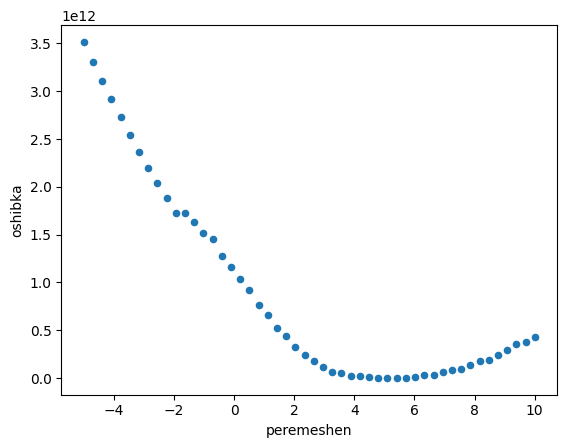

In [445]:
n = 50
ttp = np.linspace(-5, 10, n)
tttaa = pd.DataFrame({'peremeshen':ttp,'oshibka':[sum_us(i)**2 for i in ttp]})
tttaa.plot(x='peremeshen',y='oshibka',kind='scatter')

best_iter_1 = tttaa.sort_values('oshibka').iloc[0,0]

best_iter_error_1 = tttaa.sort_values('oshibka').iloc[0,1]

print(f'best_iter_1 = {best_iter_1} \nbest_iter_error_1 = {best_iter_error_1}')

In [446]:
n = 80

ttp = np.linspace(best_iter_1*0.95, best_iter_1*1.05, n)
tttaa = pd.DataFrame({'peremeshen':ttp,'oshibka':[sum_us(i)**2 for i in ttp]})

best_iter = tttaa.sort_values('oshibka').iloc[0,0]

best_iter_error = tttaa.sort_values('oshibka').iloc[0,1]

print(f'best_iter = {best_iter} \nbest_iter_error = {best_iter_error}')
best_iter_error_1 / best_iter_error

best_iter = 5.281516404029966 
best_iter_error = 25024.81250004686


31078.230241682366

In [447]:
df['lin_int'] = perem_lin('Sm',best_iter)
df['ys_b'] = df.apply(usiliya_b, axis =1)
df['ys_arm'] = df.apply(usiliya_arm, axis =1)
df['ys'] = df['ys_arm'] + df['ys_b']
df

,Sm,Area_b,Area_arm,lin_int,ys_b,ys_arm,ys
0,1,98,5,4.767441,0.000000,47674.405838,47674.405838
1,2,96,6,4.253365,0.000000,51040.377164,51040.377164
2,3,94,10,3.739289,0.000000,74785.778869,74785.778869
3,4,87,9,3.225213,0.000000,58053.836218,58053.836218
4,5,84,6,2.711137,45547.106691,32533.647636,78080.754327
5,6,81,9,2.197061,35592.396022,39547.106691,75139.502712
6,7,79,8,1.682986,26591.173469,26927.770602,53518.944071
7,8,76,10,1.168910,17767.429605,23378.196848,41145.626453
8,9,69,7,0.654834,9036.709507,9167.676311,18204.385818
9,10,64,9,0.140758,1801.704986,2533.647636,4335.352622


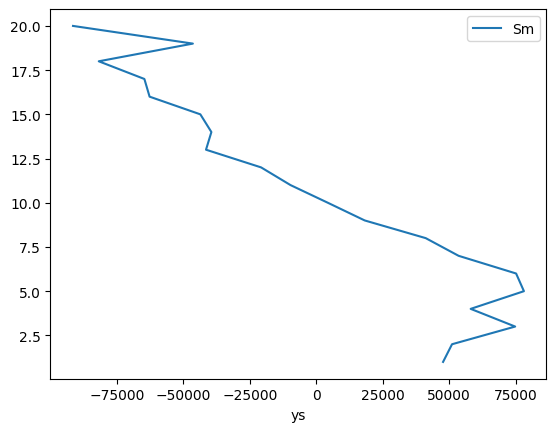

In [448]:
df.plot(x='ys',y='Sm',kind='line')